# USED CAR MARKETS
## Exploratory data analysis of Serbian and German markets

<img src="images/cars.png" style="width: 650px">

## Introduction

The number of used car transactions in the US and EU is several times as large as new-car transactions. The secondary car market in Germany is amongst the most dynamic in the EU. The aim of this analysis is to get insights into how the German used car market is influencing the Serbian market. The Following methods and techniques were used in this analysis: data collection, data cleaning, exploratory data analysis, data visualizations, and hypothesis testing. 

#### Research questions

- What car brands are predominant in Serbian and German used car markets?
- Which years of manufacture are most frequent in these markets?
- What car brands depreciate the fastest?
- What is the mileage distribution on the Serbian and German used car market?
- How significant is the correlation between mileage and price, as well as the year of manufacture and price?
- Is there any indication that importers altered the mileage on the Serbian used car market?

#### Data description

- Geographic Regions: Serbia and Germany
- Sample Size (Serbia): 58000
- Sample Size (Germany): 58000
- Data Origin: For the Serbian market analysis, data is from the specialized site for used cars polovniautomobili.com, while for the  German used car market data were obtained from the site autoscout24.com.

## Insights: Serbian used car market


Both markets are quite segmented owing to the presence of several well established and regionally popular vendors. There are 12 most popular car manufacturers presented in the graphic below, as well as their market share. Considering the fact that the Serbian market is heavily dependent on the import of used cars from Germany, we should expect some similarity when it comes to the representation of certain car manufacturers.

In [1]:
import numpy as np
import pandas as pd
from plotly_factory import *

df_serbia = pd.read_csv("data\cars_serbia.csv")
df_germany = pd.read_csv("data\cars_germany.csv").sample(n=len(df_serbia), random_state=42)

df = pd.concat([df_serbia, df_germany], sort=False)

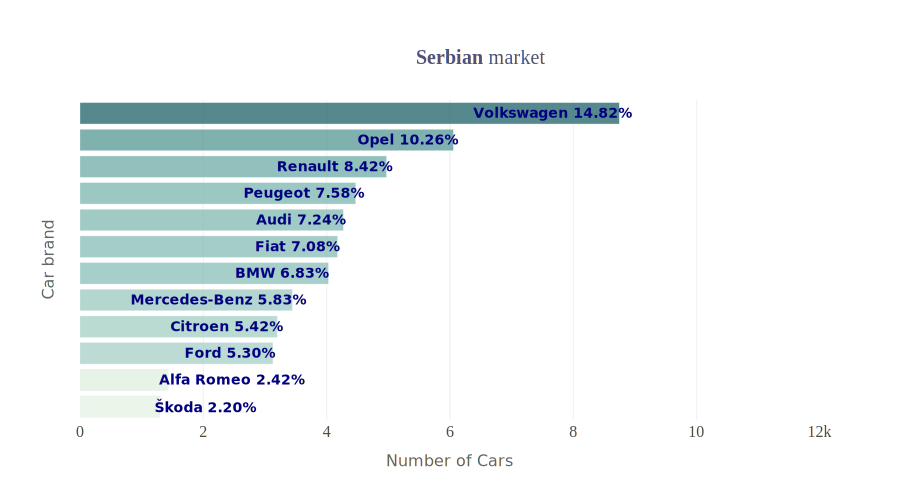

In [2]:
manufacturers_serbia = plot_horizontal_count_bars(df_serbia, "manufacturer", first_n=12, show_percentage=True)
manufacturers_serbia.update_layout(
    title=title_layout("<b>Serbian</b> market", title_size=20, color="#52527a"),
    yaxis=axis_layout("Car brand", showticklabels=False),
    xaxis=axis_layout("Number of Cars", tick_size=16, dtick=2000, range_=[0, 12000], show_exponent="last", show_grid=True),
)
manufacturers_serbia.show(renderer="svg", width=900, height=500)

We can see that German brands dominate in popularity, with Volkswagen with 14.82%, followed by Opel with a share of 10.26%. In terms of popularity, German brands are followed by French, primarily Renault and Peugeot as well as Italian Fiat.<br>
Comparing to the German market, it is clear that in the Serbian market, brands that are considered to be more luxurious (Mercedes Benz, BMW, Porsche) are less present or in less demand. <br>
Top 5 models by manufacturers and their market share on those two markets are shown below.

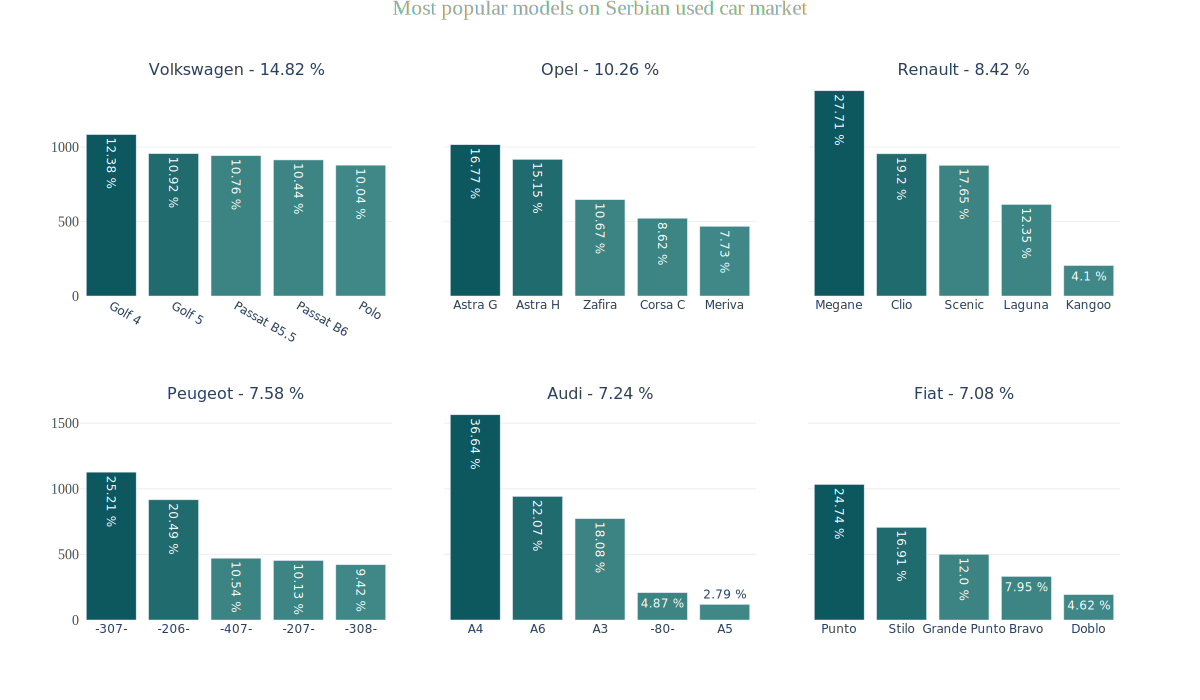

In [3]:
top_models_serb = plot_count_subplots(
    df_serbia, "manufacturer", "model", 2, 3, 5, vertical_spacing=0.2,
    show_main_percentages=True, transparent=True, share_x=False)
top_models_serb.update_layout(
    margin = {"t": 80}, 
    title=title_layout("Most popular models on Serbian used car market", y_position=1))
top_models_serb.show(renderer="svg", height = 700, width=1200)

In [4]:
top_body_styles_serb = plot_horizontal_count_bars(df_serbia,"body_style",show_percentage=True, first_n=6)
top_body_styles_serb.update_layout(
    margin={"l":15,"r":20},
    title=title_layout("Body Type", title_size=20, color="#52527a", y_position=0.85),
    yaxis=axis_layout(showticklabels=False),
    xaxis=axis_layout(showticklabels=False),
)

top_transmissions_serb = plot_horizontal_count_bars(df_serbia, "transmission", show_percentage=True, first_n=2)
top_transmissions_serb.update_layout(
    margin={"l":15,"r":15},
    title=title_layout("Transmission", title_size=20, color="#52527a", y_position=0.85),
    yaxis=axis_layout(showticklabels=False),
    xaxis=axis_layout(showticklabels=False),
)

top_fuel_types_serb = plot_horizontal_count_bars(df_serbia, "fuel_type", show_percentage=True, first_n=3)
top_fuel_types_serb.update_layout(
    margin={"l":20,"r":15},
    title=title_layout("Fuel", title_size=20, color="#52527a", y_position=0.85),
    yaxis=axis_layout(showticklabels=False),
    xaxis=axis_layout(showticklabels=False),
)
#top_body_styles_serb.show(renderer="svg", height = 350, width=350)
#top_transmissions_serb.show(renderer="svg", height = 350, width=350)
#top_fuel_types_serb.show(renderer="svg", height = 350, width=350)
print()

<img src="images/serb_dist.png" style="width: 1000px">

With a total of 35.39% of market share, the hatchback is the most popular type of a car in the Serbian market, followed by sedans and station wagons with a share of 23.84% and 18.34%, respectively, while the share of pickups and roadsters is almost negligible with a total of 2%. <br>
As far as fuels are concerned, the offer of diesel cars on the market is significantly higher than the offer of the cars that uses any other type of fuel. Market share for the engines that use gasoline is 23.3%, while all other motor fuels (methane, electric and others) are negligible in this market. <br>
Finally, it should be noted that cars with manual transmission have absolute primacy in the Serbian market with 85.57%.

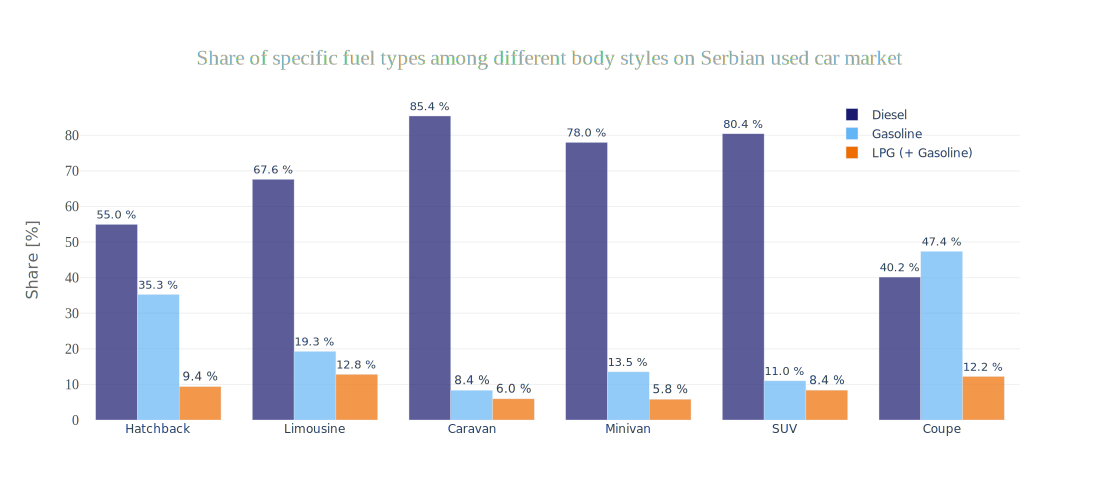

In [5]:
body_styles = ['Hatchback', 'Limousine', 'Caravan', 'Minivan', 'SUV', 'Coupe']
fuel_types = ["Diesel", "Gasoline", "LPG (+ Gasoline)"]

fuel_distribution_serb = plot_histograms(df_serbia, "body_style", body_styles, "fuel_type",  fuel_types, 
    y_legend=1, text_position="outside", percentage=True, percentage_relative_to="main_category", show_text=True
)
fuel_distribution_serb.update_layout(
    title=title_layout("Share of specific fuel types among different body styles on Serbian used car market"),
    yaxis=axis_layout("Share [%]", show_grid=True)
)
fuel_distribution_serb.show(renderer="svg", height = 500, width=1100)

## Insights: German used car market

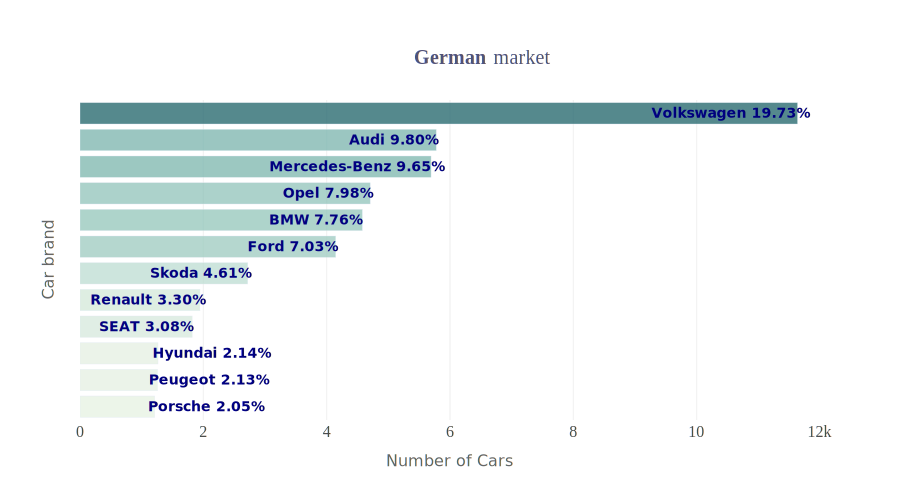

In [6]:
manufacturers_germany = plot_horizontal_count_bars(df_germany, "manufacturer",first_n=12, show_percentage=True,)
manufacturers_germany.update_layout(
    title=title_layout("<b>German</b> market", title_size=20, color="#52527a"),
    yaxis=axis_layout("Car brand", showticklabels=False),
    xaxis=axis_layout("Number of Cars", tick_size=16, dtick=2000, range_=[0, 12000], show_exponent="last", show_grid=True),
)
manufacturers_germany.show(renderer="svg", width=900, height=500)

Volkswagen is the most dominant car manufacturer on the German market with 19.73% of market share. Interestingly, there are no foreign brands among the top five. When it comes to foreign manufacturers Ford has 7.03% of market share then follows Skoda with 4.61%, Renault and SEAT with about 3%, Hyundai, Peugeot and Porsche with about 2%. It should be also noted that there are is only one Asian car manufacturer on the list.<br>

Most poular models per manufacturer on the German used car market

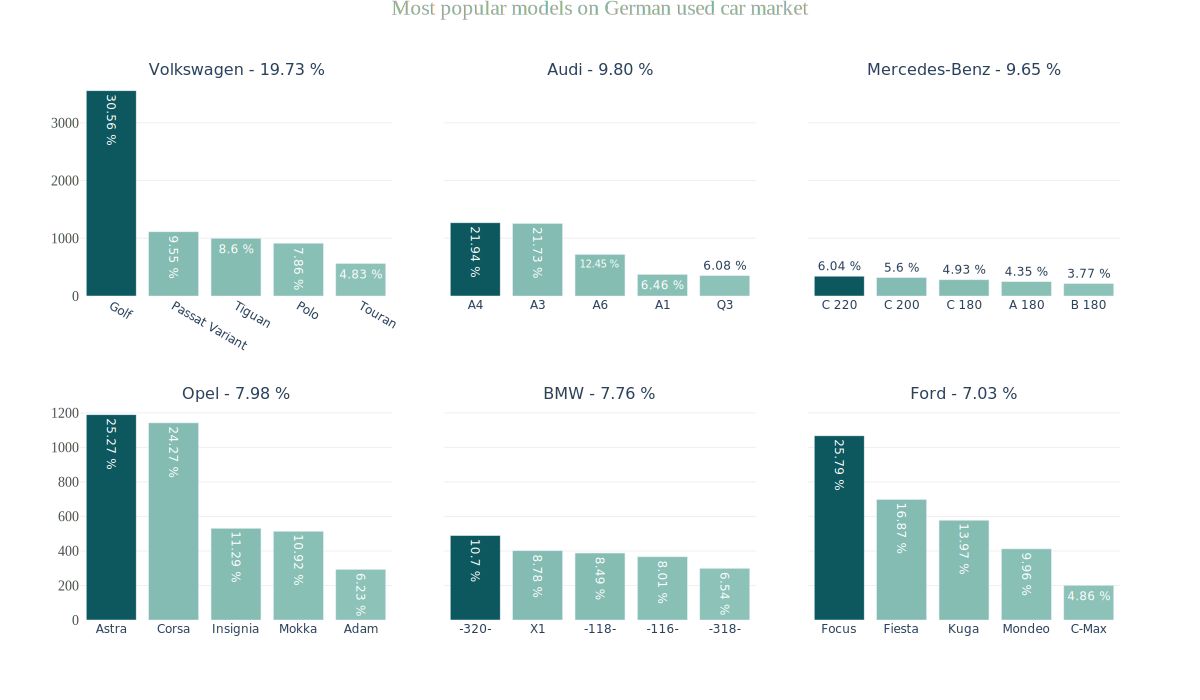

In [7]:
top_models_ger = plot_count_subplots(
    df_germany, "manufacturer", "model", 2, 3, 5, vertical_spacing=0.2,
    show_main_percentages=True, transparent=True, share_x=False)
top_models_ger.update_layout(
    margin = {"t": 80}, 
    title=title_layout("Most popular models on German used car market", y_position=1))
top_models_ger.show(renderer="svg", height = 700, width=1200)

In [8]:
top_body_styles_ger = plot_horizontal_count_bars(df_germany,"body_style",show_percentage=True, first_n=6)
top_body_styles_ger.update_layout(
    margin={"l":15,"r":20},
    title=title_layout("Body Type", title_size=20, color="#52527a", y_position=0.85),
    yaxis=axis_layout(showticklabels=False),
    xaxis=axis_layout(showticklabels=False),
)

top_transmissions_ger = plot_horizontal_count_bars(df_germany, "transmission", show_percentage=True, first_n=2)
top_transmissions_ger.update_layout(
    margin={"l":15,"r":15},
    title=title_layout("Transmission", title_size=20, color="#52527a", y_position=0.85),
    yaxis=axis_layout(showticklabels=False),
    xaxis=axis_layout(showticklabels=False),
)

top_fuel_types_ger = plot_horizontal_count_bars(df_germany, "fuel_type", show_percentage=True, first_n=3)
top_fuel_types_ger.update_layout(
    margin={"l":20,"r":15},
    title=title_layout("Fuel", title_size=20, color="#52527a", y_position=0.85),
    yaxis=axis_layout(showticklabels=False),
    xaxis=axis_layout(showticklabels=False),
)
#top_body_styles_ger.show(renderer="svg", height = 350, width=350)
#top_transmissions_ger.show(renderer="svg", height = 350, width=350)
#top_fuel_types_ger.show(renderer="svg", height = 350, width=350)
print()

<img src="images/ger_dist.png" style="width: 1000px">

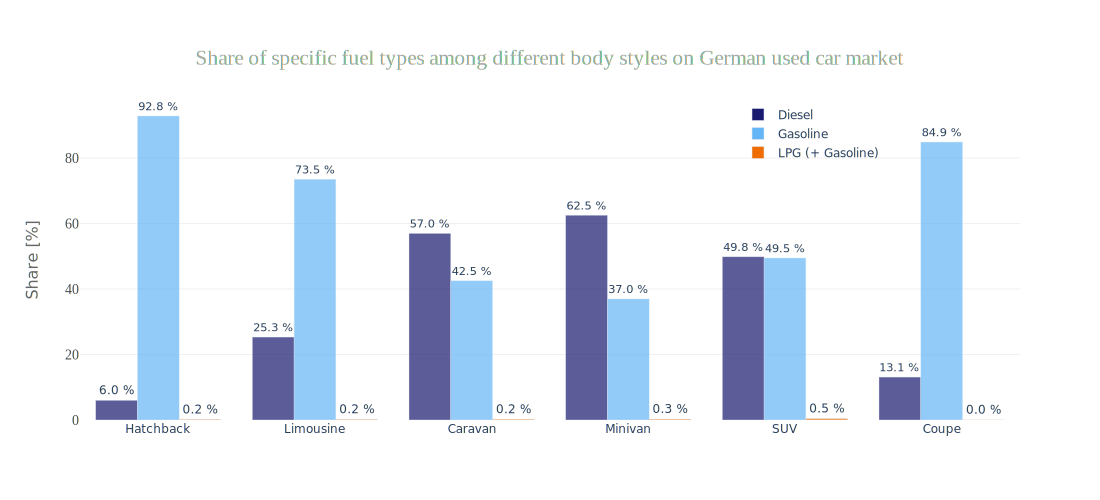

In [9]:
fuel_distribution_ger = plot_histograms(df_germany, "body_style", body_styles, "fuel_type",  fuel_types, 
    y_legend=1, x_legend=0.7, text_position="outside", percentage=True, percentage_relative_to="main_category", show_text=True
)
fuel_distribution_ger.update_layout(
    title=title_layout("Share of specific fuel types among different body styles on German used car market"),
    yaxis=axis_layout("Share [%]", show_grid=True)
)
fuel_distribution_ger.show(renderer="svg", height = 500, width=1100)

## Comparative Analysis: German and Serbian Market

<img src="images/ger_serb.png" style="width: 350px">

#### Distribution by year of production

To gain a better understanding of the specificity of the German and Serbian used car markets, we will present the distribution of cars by year of production in these markets over the 2000 to 2019 intervals. Cars produced in this time interval takes about 90% of the Serbian market share and 96% of the German market share. We can immediately see that the distribution of cars by year in the Serbian market is significantly shifted towards older cars relative to the German market and that it has a roughly normal shape with a median of 2005. Distribution for newer cars is growing exponentially so cars manufactured in 2018 make up as much as 20% of the total market.


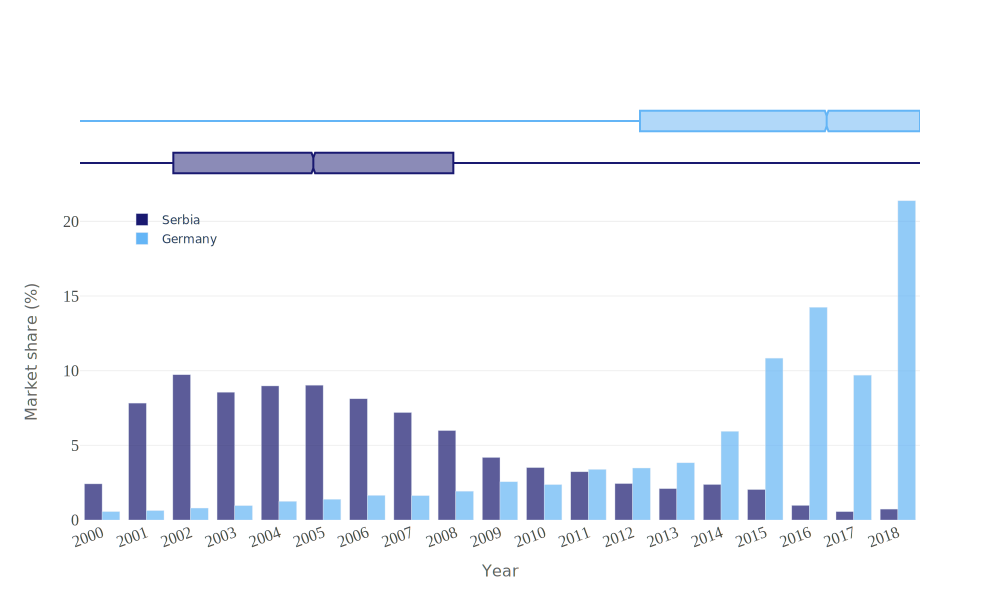

In [10]:
year_distribution = plot_histograms(df, "year",  np.arange(2000, 2019), "country",  ["Serbia", "Germany"], 
    text_position="auto", show_box=True, x_legend=0.05, y_legend=0.75, percentage=True, mean=False)

year_distribution.update_layout(
        yaxis2=axis_layout("Market share (%)", tick_size=16, show_grid=True),
        xaxis2=axis_layout(title="Year", dtick=1, tick_size=16, tick_angle=-20),
)
year_distribution.show(renderer="svg", height = 600, width=1000)

Distribution can also be described as follows: the median of the distribution in the German market is 2016, while in Serbian it is 2005. Half of all advertised cars in the Serbian market are in the interval from 2002 to 2008, and in the German market half of all cars are in the interval from 2012 to 2019.

In recent years, there is an increasing trend in demand for SUVs at the expense of caravans. The market's response to that demand is shown in the graph at the bottom left, where it can be clearly seen that demand for SUVs relative to all other types of cars has risen from 9.1% in 2009 up to 42.6% for vehicles manufactured in 2018. In addition, it is interesting to note the upward trend in cars with automatic transmission from 16% to about 40% over the last decade.

#### Mileage distribution

To further compare two markets, it is also useful to have an insight into the mileage distribution. Considering that mileage is also significantly influenced by the year of production, the cars are segmented by year and then boxed diagrams are shown for each year individually, ranging from 2005 to 2015.

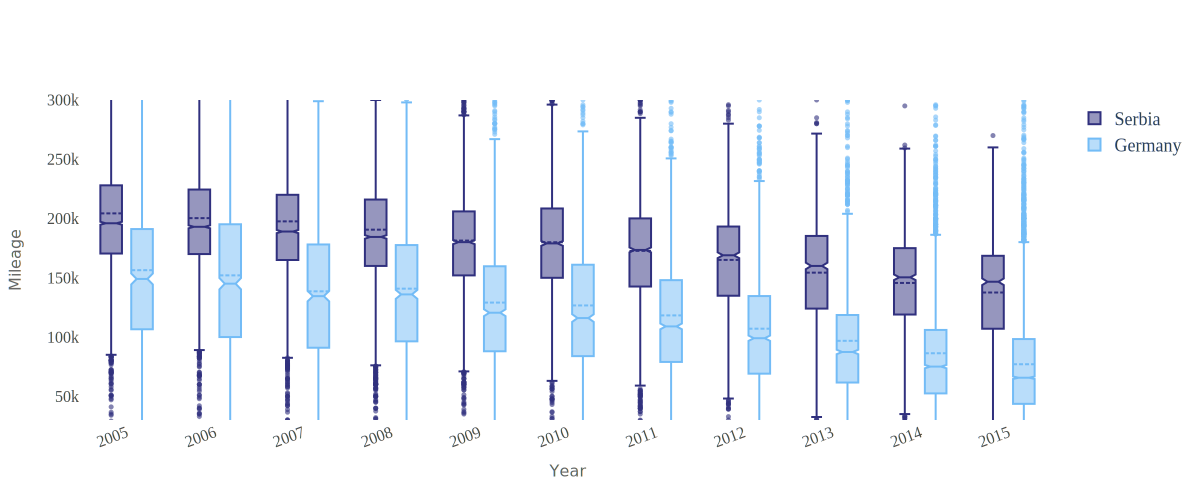

In [11]:
mileage_per_year = plot_box(df, "mileage", "year", np.arange(2005, 2016), "country",  ["Serbia", "Germany"])

mileage_per_year.update_layout(
        xaxis=axis_layout("Year", tick_size=16, dtick=1, tick_angle=-20),
        yaxis=axis_layout( "Mileage", tick_size=16, range_=[30000, 300000]),
)
mileage_per_year.show(renderer="svg", height = 500, width=1200)

Diagram shows that cars in the Serbian market are significantly more used in terms of mileage so that the average mileage for each year for cars from the Serbian market is as much as 50,000 to 80,000 km higher than cars from the German market.

#### Price distribution

Box chart depicted in the figure below represents distributions of prices for each year individually. Looking only at the German market, we can see a big difference between mean and the median, which is an indication that there are luxury, expensive cars in that market that "pull" the distribution towards the higher prices. Therefore, the statistical magnitude that gives a more realistic insight into the distribution is certainly median.


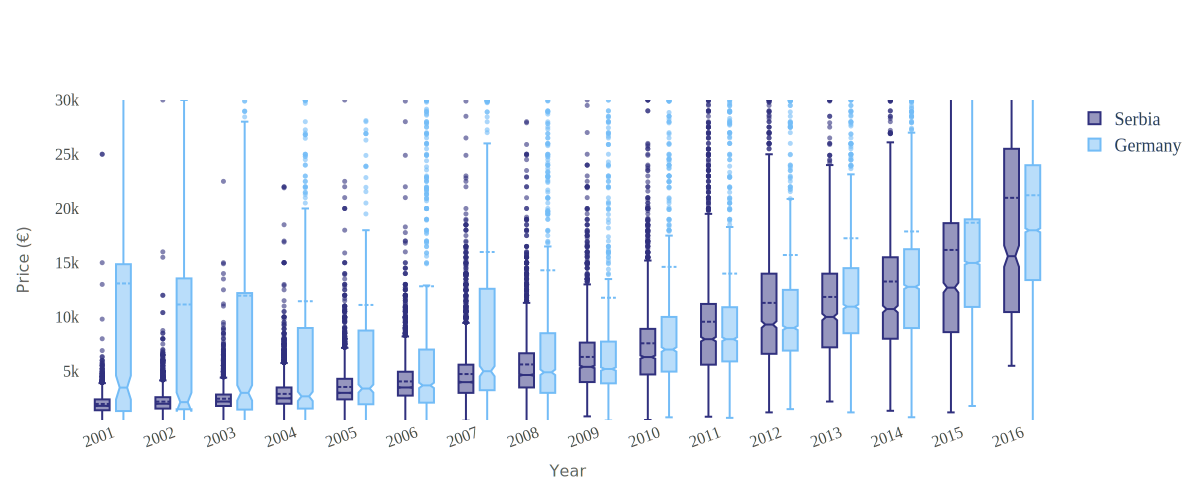

In [12]:
price_per_year = plot_box(df, "price", "year", np.arange(2001, 2017), "country", ["Serbia", "Germany"])

price_per_year.update_layout(
        xaxis=axis_layout("Year", tick_size=16, dtick=1, tick_angle=-20),
        yaxis=axis_layout("Price (€)", tick_size=16, range_=[500, 30000]),
)
price_per_year.show(renderer="svg", height = 500, width=1200)

Except for new cars (produced after 2012), with the new graph, we can see that median prices in the German market are generally higher than in the Serbian market. However, the median prices in these markets for each year individually are in a good match, i.e. deviations shall not exceed ± 10%. <br>
<br>
For further insight into the specifics of these markets, the price distribution in the Serbian (above) and German (below) markets is shown separately. From the distributions shown, we can see a significant difference when it comes to price distribution. The German market is characterized by a wide range of prices and is oriented towards more expensive cars, while prices in the Serbian market are concentrated at a relatively narrow interval so the median (as well as the medium value) are shifted towards lower price values.


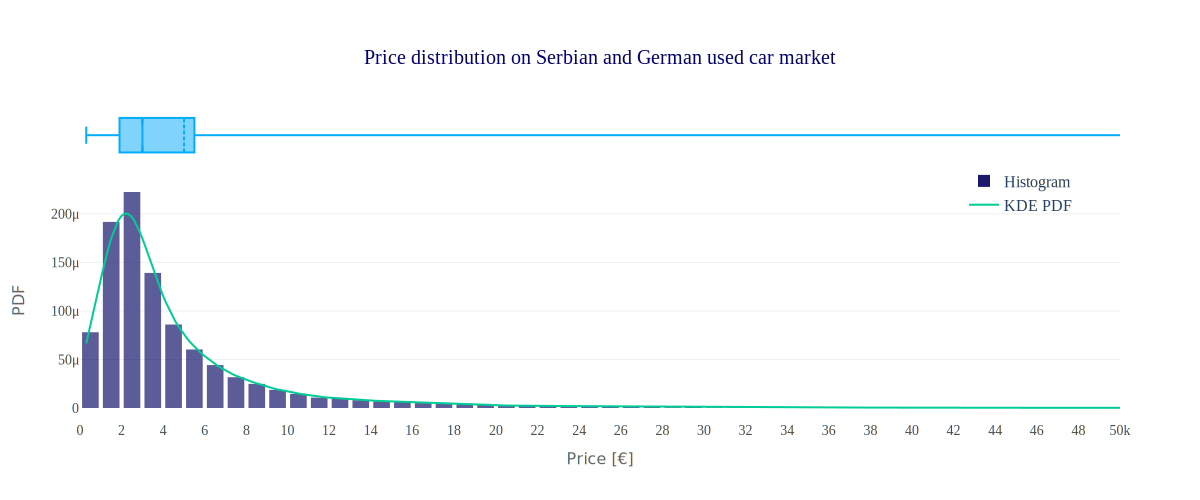

In [13]:
price_distplot_serb = plot_distplot(df_serbia, "price", kde_resolution=1024, gauss=False, n_bins=256, bargap=0.2)
price_distplot_serb.update_layout(
    title = title_layout("Price distribution on Serbian and German used car market", color="#000066", title_size=20),
    xaxis1 = axis_layout(range_=[0, 50000], showticklabels=False),
    xaxis2 = axis_layout("Price [€]",range_=[0, 50000], show_exponent="last", dtick=2000),
    yaxis2 = axis_layout("PDF", show_grid=True),
)

price_distplot_ger = plot_distplot(df_germany, "price", kde_resolution=1024, gauss=False, n_bins=256, bargap=0.2)
price_distplot_ger.update_layout(
    xaxis1 = axis_layout(range_=[0, 50000], showticklabels=False),
    xaxis2 = axis_layout("Price [€]", range_=[0, 50000], showticklabels=False),
    yaxis2 = axis_layout("PDF", show_grid=True),
)
price_distplot_serb.show(renderer="svg", height = 500, width=1200)

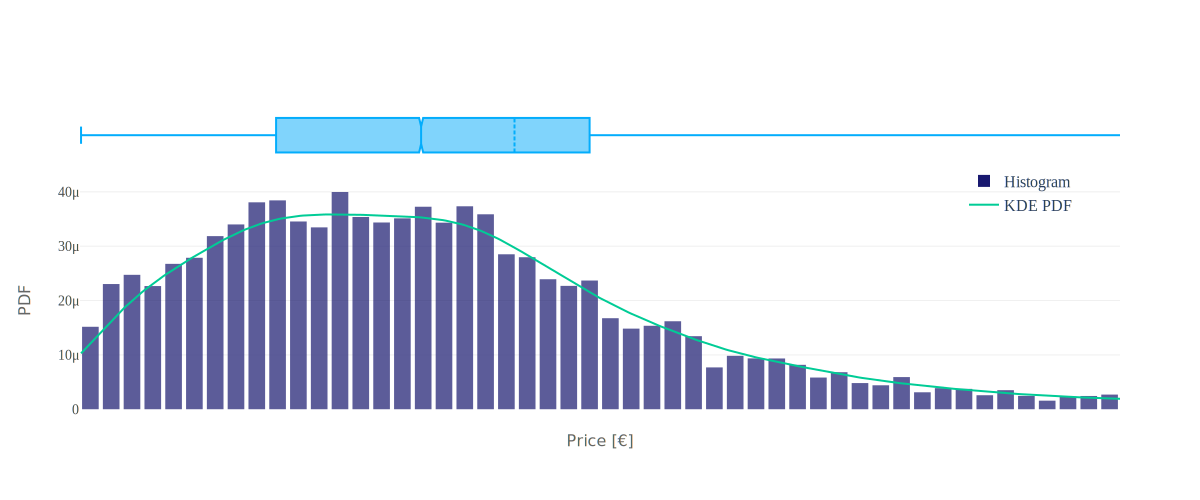

In [14]:
price_distplot_ger.show(renderer="svg", height = 500, width=1200)

For the German used car market, half of all cars are priced between 9,400 and 24,500 euros (first and third quartiles), with a median and mean of 16,440 and 20,900 euros respectively. This difference between the mean and the median indicates a certain asymmetry in the price distribution, that is, its shift towards higher prices. <br>
As mentioned above, car prices in the Serbian market are narrowly concentrated and shifted to lower values so that the first and third quartiles are at 1900 and 5500 euros.

In [15]:
body_per_year_serb = plot_histograms(df_serbia, "year",  np.arange(2009, 2019),"body_style", ["SUV", "Caravan"],
                                    percentage=True, sort_values="initial", percentage_relative_to="main_category", y_legend=1, x_legend=0.02)
body_per_year_serb.update_layout(
    xaxis=axis_layout("Year", tick_size=16, dtick=1),
    title=title_layout("Increasing trend in SUV offer on Serbian..."),
    yaxis=axis_layout("Share [%]", show_grid=True)
)
body_per_year_ger = plot_histograms(df_germany, "year",  np.arange(2009, 2019),"body_style", ["SUV", "Caravan"],
                                    percentage=True, sort_values="initial", percentage_relative_to="main_category", y_legend=1, x_legend=0.02)
body_per_year_ger.update_layout(
    xaxis=axis_layout("Year", tick_size=16, dtick=1),
    title=title_layout("...and German used car market"),
    yaxis=axis_layout(show_grid=True)
)

#body_per_year_serb.show(renderer="svg", height = 500, width=700)
#body_per_year_ger.show(renderer="svg", height = 500, width=700)
print()

<img src="images/SUV_trend.png" style="width: 1200px">

The Volkswagen emissions scandal, also known as Dieselgate or Emissionsgate, began in September 2015, when the United States Environmental Protection Agency (EPA) issued a notice of violation of the Clean Air Act to German automaker Volkswagen Group. <br>
As a result of this scandal, stock prices of the group were almost cut in half and company reputation went in question. The graph shows diesel and gasoline engines by year of production. we can see the trend of slightly increasing in demand for diesel cars up until 2015.,which is the year when the affair began. Starting from 2016, there was a significant drop in the share of diesel engines from 90% of share in 2015. up to 60% for 2018.

In [16]:
fuel_per_year_serb = plot_histograms(df_serbia, "year",np.arange(2009, 2019), "fuel_type", ["Diesel", "Gasoline"], 
                                    percentage=True, percentage_relative_to="main_category", sort_values="initial", y_legend=1, x_legend=0.75)
fuel_per_year_ger = plot_histograms(df_germany, "year",np.arange(2009, 2019), "fuel_type", ["Diesel", "Gasoline"], 
                                    percentage=True, percentage_relative_to="main_category", sort_values="initial", y_legend=1, x_legend=0.75)
fuel_per_year_serb.update_layout(
        title=title_layout("Fuel type by year on Serbian...", title_size=20, color="#52527a"),
        xaxis=axis_layout("Year", tick_size=16, dtick=1, tick_angle=-20),
        yaxis=axis_layout("Share per year (%)", tick_size=16, show_grid=True),
)

fuel_per_year_ger.update_layout(
        title=title_layout("...and German used car market", title_size=20, color="#52527a"),
        xaxis=axis_layout("Year", tick_size=16, dtick=1, tick_angle=-20),
        yaxis=axis_layout(tick_size=16, show_grid=True),
)
#fuel_per_year_serb.show(renderer="svg", height = 500, width=700)
#fuel_per_year_ger.show(renderer="svg", height = 500, width=700)
print()

<img src="images/gasoline_trend.png" style="width: 1200px">

## Impact of mileage and year of production on price

Finally, we will answer the question of what largely determines the prices of used cars. To begin with, let's say that in addition to the model and brand of the car, the most important features that characterize it are price, year of production and mileage. For a quantitative description of correlation Spearman's correlation coefficients were used for each pair of these quantities, individually for the Serbian and German markets, and were calculated to quantify the correlation. The cars were further segmented by diesel and gasoline, while the time interval 2005-2015 was considered.


In [17]:
per_year_ger = []
for year in np.arange(2005, 2016):
    per_year_ger.append(df_germany.loc[df_germany.year==year].sample(n=700))

per_year_serb = []
for year in np.arange(2005, 2016):
    per_year_serb.append(df_serbia.loc[df_serbia.year==year].sample(n=700))

df_germany0814 = pd.concat(per_year_ger)
df_serbia0814 = pd.concat(per_year_serb)

corr_germany_dizel = df_germany0814[["year", "price", "mileage"]].loc[df_germany0814.fuel_type=="Diesel"].corr("spearman")
corr_serbia_dizel = df_serbia0814[["year", "price", "mileage"]].loc[df_serbia0814.fuel_type=="Diesel"].corr("spearman")

corr_germany_benzin = df_germany0814[["year", "price", "mileage"]].loc[df_germany0814.fuel_type=="Gasoline"].corr("spearman")
corr_serbia_benzin = df_serbia0814[["year", "price", "mileage"]].loc[df_serbia0814.fuel_type=="Gasoline"].corr("spearman")


germany_dizel = plot_heatmap(corr_germany_dizel, cut_in_half=True, showscale=False)
germany_dizel.update_layout(
    title=title_layout("Diesel", title_size =20, color='#A8A8A8'), 
    xaxis=axis_layout(title_size=20, tick_size=17, ticks=None),
    yaxis=axis_layout("Germany", title_size=18, tick_size=17, tick_angle=-90, ticks="outside"),
)

serbia_dizel = plot_heatmap(corr_serbia_dizel, cut_in_half=True, showscale=False)
serbia_dizel.update_layout(
    xaxis=axis_layout(tick_size=17, ticks=None),
    yaxis=axis_layout("Serbia", title_size=18, tick_size=17, tick_angle=-90, ticks="outside"),
)

germany_benzin = plot_heatmap(corr_germany_benzin, cut_in_half=True, showscale=False)
germany_benzin.update_layout(
    title=title_layout("Gasoline", title_size =20, color='#A8A8A8'), 
    xaxis=axis_layout(tick_size=17, ticks=None),
    yaxis=axis_layout(title_size=18, tick_size=17, tick_angle=-90, ticks="outside"),
)

serbia_benzin = plot_heatmap(corr_serbia_benzin, cut_in_half=True, showscale=False)
serbia_benzin.update_layout(
    xaxis=axis_layout(tick_size=17),
    yaxis=axis_layout(title_size=18, tick_size=17, tick_angle=-90, ticks="outside"),
)
print()

<img src="images/ger.png" style="width: 850px">

As for the German market, the price-mileage correlation coefficient of −0.60 for diesel and −0.56 for gasoline engines clearly shows that car mileage largely determines its price (the negative value of the coefficient is expected because it shows that as car mileage goes up price is going down) The price-year correlation is expected to be positive, higher for diesel cars, indicating that newer diesel cars are more expensive than gasoline-powered cars. Finally, the higher year-mileage ratio for diesel cars indicates that diesel cars exceed higher mileage per year than gasoline-powered cars.


<img src="images/serb.png" style="width: 850px">

The situation on the Serbian market is somewhat different, and it can be observed that the pricing of cars is primarily influenced by the year of production for both types of fuels. On the other hand, mileage does not seem to affect pricing to a great extent, аs was the case with German cars. <br>
Comparative analysis of these markets shows that very diverse impact of mileage and production year on pricing in the German and Serbian markets. As mileage is a measure of the car's "wear and tear", its significant impact on the German market is as expected. In other words, when buying a car from the German market, customers pay almost equal attention to the year of production and the mileage. On the other hand, the Serbian market is distinguished by the fact that the influence of mileage on pricing is more than twice less, while the impact of the year of production is significantly greater than the German market. Based on this, it can be concluded that car buyers from the Serbian used car market consider the mileage an unreliable (subject to forgery) criterion when choosing a car so they particularly pay attention to the year of production as a feature of a vehicle that is much harder (almost impossible) to forge. The apparent distrust of customers in the stated value of mileage in the Serbian market is a good indication that it indeed can be deliberately modified (reduced) before advertising.

## Conclusion

Volkswagen is by far the most popular manufacturer in both markets. Regarding the year of production, on the Serbian market, the most dominant models are produced between 2001 and 2008, while the German market is more prevalent with newer models made since 2015. <br>
Diesel is the most predominant fuel type on the Serbian market while gasoline is dominant in the German market. This can be explained by the fact that newer cars that use gasoline are more present on the German market, while diesel cars are in great demand in the Serbian market because these engines are considered to be more durable and exceed greater mileage than gasoline engine. <br>
Cars in the Serbian market have higher average mileage than cars in the German market, which shows that these cars are older and more worn out
Despite the fact that the two markets are significantly different when it comes to the supply and the price, 
